In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.read_csv('pokemon.csv')
df

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False
148,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
149,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [4]:
df.shape

(151, 12)

In [5]:
df.isnull()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
146,False,False,True,False,False,False,False,False,False,False,False,False
147,False,False,True,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,True,False,False,False,False,False,False,False,False,False


In [6]:
df['Name'].unique

<bound method Series.unique of 0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
146       Dratini
147     Dragonair
148     Dragonite
149        Mewtwo
150           Mew
Name: Name, Length: 151, dtype: object>

In [17]:
data = df.copy()

In [14]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [18]:
for i in ['Name', 'Type 1', 'Type 2', 'Legendary']:
    data[i] = encode.fit_transform(data[i])
df.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,7,6,318,45,49,49,65,65,45,1,0
1,56,7,6,405,60,62,63,80,80,60,1,0
2,139,7,6,525,80,82,83,100,100,80,1,0
3,14,5,11,309,39,52,43,60,50,65,1,0
4,15,5,11,405,58,64,58,80,65,80,1,0


In [19]:
data.isnull()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
146,False,False,False,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

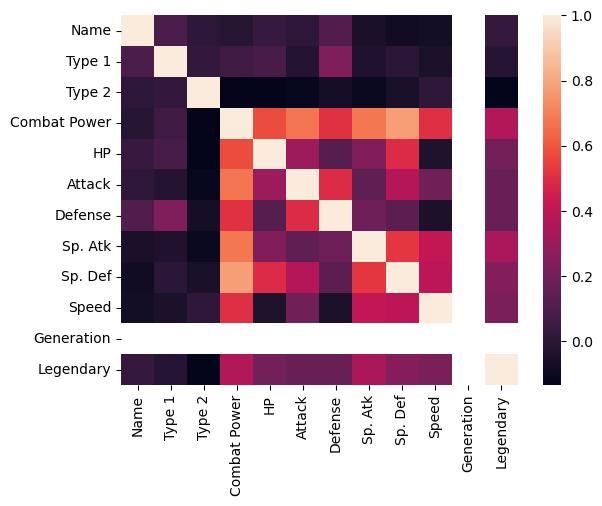

In [21]:
import seaborn as sns
sns.heatmap(data.corr())

In [26]:
selected_features = ['Name','Type 1','Type 2','HP','Defense','Speed','Legendary']


In [27]:
X= data[selected_features]
y= data['Combat Power']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
X_train.shape

(120, 7)

In [54]:
y_train.shape

(120,)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.linear_model import LinearRegression

In [56]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
prediction = reg.predict(X_test)
prediction

array([322.75236246, 512.5660515 , 312.37867154, 311.73091924,
       297.95553838, 264.90825782, 331.99326218, 392.73786868,
       417.89497297, 459.44085186, 381.00977212, 321.14628523,
       292.4999024 , 333.8417835 , 499.27361833, 519.11792856,
       271.60431917, 303.12002854, 436.369019  , 451.75310459,
       461.1052094 , 435.62106184, 469.23706955, 348.4475254 ,
       436.99314247, 470.93768497, 544.83902393, 470.41111409,
       480.72714954, 442.91805712, 255.43351223])

In [47]:
prediction = reg.predict(X_train)
prediction

array([329.41639699, 490.45523237, 521.33597512, 412.9947662 ,
       329.02875213, 384.65227385, 416.33394691, 384.76401037,
       296.50060053, 505.7002691 , 336.19706692, 400.83653994,
       585.55787369, 463.98027093, 385.40779763, 473.47294743,
       297.69143892, 334.54436992, 294.74998386, 487.1923444 ,
       298.36879212, 488.79342013, 472.98881521, 326.11524059,
       292.03376428, 546.9858974 , 503.10089096, 417.50157665,
       301.97657038, 284.60378844, 496.07637075, 388.81638125,
       568.59559502, 339.44904526, 346.3939226 , 480.9032847 ,
       666.19439507, 463.47546832, 307.92027301, 381.88515574,
       318.53471626, 468.77250474, 392.86285098, 282.54461945,
       343.72057158, 494.56839482, 310.59706505, 398.04659766,
       373.90088075, 445.20917847, 421.63856184, 510.24067263,
       393.80259498, 277.63454024, 429.50903772, 322.01126701,
       268.89931787, 289.31358335, 468.84955176, 365.63476543,
       348.20458065, 364.35155418, 406.88736643, 336.69

In [58]:
df.describe()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,151.000000,151.000000,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000
mean,75.000000,8.463576,8.198675,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,69.000000,1.0,0.033113
std,43.734045,4.529569,3.603739,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.935726,0.0,0.179526
min,0.000000,0.000000,0.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0,0.000000
25%,37.500000,5.000000,6.000000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.0,0.000000
50%,75.000000,10.000000,11.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.0,0.000000
75%,112.500000,12.000000,11.000000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,1.0,0.000000
max,150.000000,14.000000,11.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000,1.0,1.000000


In [59]:
print(prediction.shape, y_test.shape)


(31,) (31,)


In [62]:
import warnings 
warnings.filterwarnings('ignore')

<Axes: xlabel='Combat Power', ylabel='Density'>

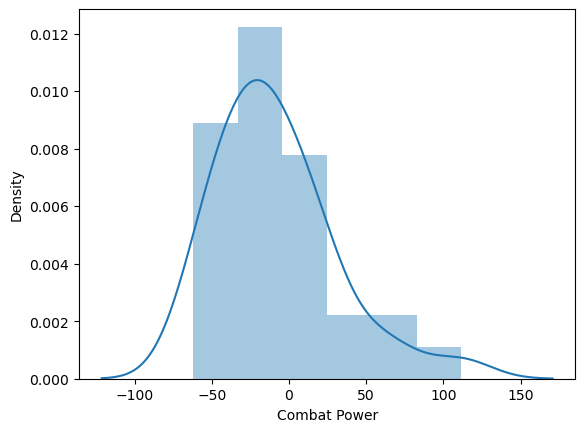

In [66]:
sns.distplot(prediction-y_test)
